Print the learned parameters [-7.50661603  0.98898575  0.99174245]


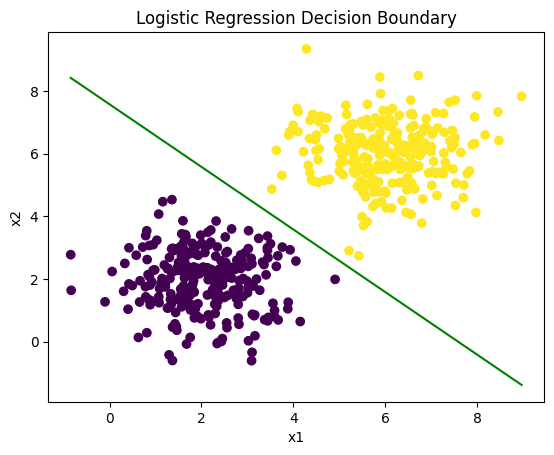

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('Logistic_regression_ls.csv')

# Extract features (x1, x2) into X and the target variable (label) into y
X = df[['x1', 'x2']].values
y = df['label'].values

# Add an intercept term (column of ones) to the features, which is necessary for the bias term in logistic regression
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Define the sigmoid function, which is the activation function used in logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function for logistic regression, which uses the sigmoid function for predictions
def cost_function(theta, X, y):
    m = len(y)  # Number of training examples
    predictions = sigmoid(X @ theta)  # Predicted labels
    # Compute the cost using the logistic regression cost formula
    error = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))
    # taking avg of errors
    cost = 1/m * sum(error)
    # Calculate the gradient (partial derivatives) for gradient descent
    gradient = 1/m * X.T @ (predictions - y)
    return cost, gradient

# Implement gradient descent to optimize the logistic regression parameters
def gradient_descent(X, y, theta, alpha, iterations):
    costs = []  # Track the cost in each iteration
    for i in range(iterations):
        cost, gradient = cost_function(theta, X, y)  # Calculate current cost and gradient
        theta -= (alpha * gradient)  # Update the parameters
        costs.append(cost)
    return theta, costs

# Initialize parameters (theta), learning rate (alpha), and number of iterations
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 20000

# Perform optimization to learn the parameters theta
theta, costs = gradient_descent(X, y, theta, alpha, iterations)
print('The learned parameters are', theta)  # Print the learned parameters

# Plot the original data points, colored by their labels
plt.scatter(X[:, 1], X[:, 2], c=y)

# Calculate and plot the decision boundary
# The decision boundary is calculated by setting the logistic regression equation to 0 and solving for x2
x_value = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_value = -(theta[0] + theta[1] * x_value) / theta[2]

# Plot the decision boundary
plt.plot(x_value, y_value, "g")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression Decision Boundary')
plt.show()